# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Diego Sánchez Luna

- ID: A00227831

- My carreer: Ingeniería en Tecnologías Computacionales


## Import libs

In [2]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


# Define where you are running the code: colab or local
RunInColab = False # (False: no | True: yes)
# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')
    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"
    # Define path del proyecto
    Ruta = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"
else:
    # Define path del proyecto
    Ruta = "C:/Users/GeekD/OneDrive/Documents/GitHub/TC1002S"
    URL = Ruta + "/Evidencia/a00227831.csv"

# Part 1

## **Using your assigned dataset:**

## A1 Load data

In [3]:
df = pd.read_csv(URL)

## A2 Data management
Print the first 7 rows

In [4]:
df.iloc[0:7,:]

,Unnamed: 0,x1,x2
0,0,1.030877,0.363515
1,1,0.677208,0.955959
2,2,-0.382497,1.130047
3,3,-0.319295,0.089919
4,4,-0.386405,1.624755
5,5,-0.749479,1.441339
6,6,-0.298645,0.152692


Print the 4 last rows

In [5]:
df.tail(4)

,Unnamed: 0,x1,x2
996,996,1.049360,0.128261
997,997,0.991189,0.298544
998,998,0.700671,-0.888454
999,999,1.124124,-0.131446


How many rows and columns are in your data?

In [6]:
print("Columnas: "+str(df.shape[1])+"\t\tFilas: "+str(df.shape[0]))

Columnas: 3		Filas: 1000


Print the name of all the columns

In [7]:
df.columns  

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

In [8]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

    1) ID del registro, se encuentra duplicada por la función de lectura de pandas
    2) Medida flotante en la dimensión x1
    3) Medida flotante en la dimensión x2

Print a statistical summary of your columns

In [9]:
df.describe()

,Unnamed: 0,x1,x2
count,1000.000000,1000.000000,1000.000000
mean,499.500000,0.252284,0.495796
std,288.819436,0.523188,0.889624
min,0.000000,-0.821863,-1.445373
25%,249.750000,-0.226073,-0.120925
50%,499.500000,0.271606,0.518328
75%,749.250000,0.697908,1.100311
max,999.000000,1.331401,2.451351


Answer:


    1) What is the minimum and maximum values of each variable?
            Max                                 Min
        unnamed: 999                         unnamed: 0
        x1: 1.331401                         x1: -0.821863
        x2: 2.451351                         x2: -1.445373
        
        
    2) What is the mean and standar deviation of each variable
           Mean                                 STD
        unnamed: 499.5                  unnamed: 288.819436
        x1: 0.252284                       x1: 0.523188
        x2: 0.495796                       x2: 0.889624
        
        
    3) What the 25%, 50% and 75% represent?
        Se trata de los cuartiles de nuestro conjunto de datos y se distribuyen de la siguiente manera
        - 25%.-	25% de los datos es menor que o igual a este valor.
        - 50%.-	La mediana. 50% de los datos es menor que o igual a este valor.
        - 75%.-	75% de los datos es menor que o igual a este valor.

Rename the columns using the same name with capital letters

In [10]:
df = df.rename(columns={"Unnamed: 0": "Index", "x1" : "X1", "x2" : "X2"})

Rename the columns to their original names

In [11]:
df = df.rename(columns={"Index": "Unnamed: 0", "X1" : "x1", "X2" : "x2"})

Use two different alternatives to get one of the columns

In [12]:
print(df["x1"])
print('\n'+str(df.iloc[:,1]))

0      1.030877
1      0.677208
2     -0.382497
3     -0.319295
4     -0.386405
         ...   
995    0.058066
996    1.049360
997    0.991189
998    0.700671
999    1.124124
Name: x1, Length: 1000, dtype: float64

0      1.030877
1      0.677208
2     -0.382497
3     -0.319295
4     -0.386405
         ...   
995    0.058066
996    1.049360
997    0.991189
998    0.700671
999    1.124124
Name: x1, Length: 1000, dtype: float64


Get a slice of your dataset second and third columns and rows from 62 to 72

In [13]:
df.iloc[62:72, 2:3]

,x2
62,0.076857
63,-0.012296
64,-0.427920
65,2.148473
66,1.565853
67,2.153031
68,0.426566
69,-0.309148
70,-0.824856
71,0.798802


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [14]:
print("Valores nulos: "+str(df.iloc[:,2:3].isnull().sum())+
     "\n\nValores no nulos: "+str(df.iloc[:,2:3].notnull().sum()))

Valores nulos: x2    0
dtype: int64

Valores no nulos: x2    1000
dtype: int64


Discard the last column (Index in this case)

In [15]:
df.drop("Unnamed: 0", axis=1, inplace = True)

**Questions**

Based on the previous results, provide a description of your dataset.

Your response:


En este dataset se nos brindan dos columnas con datos de medición en el rango de los números reales en las dimensiones x1 y x2, dándonos los valores necesarios para graficar.

## A3 Data visualization

Plot in the same figure the histogram of the two variables

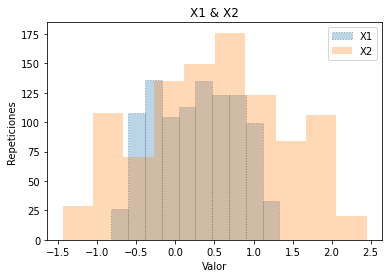

In [16]:
plt.hist(df.x1, alpha = .3, ls = "dotted", edgecolor = "black")
plt.hist(df.x2, alpha = .3)
plt.title("X1 & X2")
plt.xlabel("Valor")
plt.ylabel("Repeticiones")
plt.legend(["X1", "X2"])
plt.show()

**Based on this plots, provide a description of your data**

Your response here:
    
Como podemos observar en el histograma, los registros de la variable x1 tienen un rango mucho menor a aquellos encontrados en la variable x2. Además de que estas se concentran principalmente en los valores centrales entre -0.5 y 1.5.

Plot in the same figure the boxplot of the two variables

C:\Users\GeekD\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


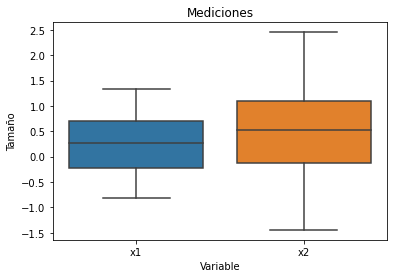

In [17]:
sns.boxplot(data=df, orient="v")
plt.ylabel("Tamaño")
plt.xlabel("Variable")
plt.title("Mediciones")
plt.show()

Scatter plot of the two variables

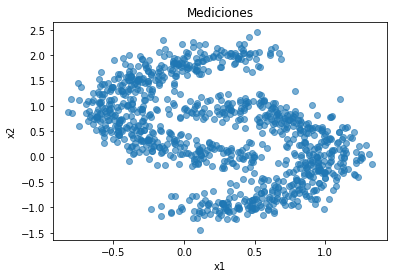

In [18]:
plt.scatter(df.x1, df.x2, alpha = 0.6)
plt.title("Mediciones")
plt.xlabel("x1")
plt.ylabel("x2")


plt.show()

### Questions 

Based on the previous plots, provide a description of yout dataset

Your response:
    Con estas gráficas volvemos a ver la diferencia que hay entre las dos mediciones, siendo x2 aquella con valores más altos. Dicho esto, podemos ver que forman una especie de figura con los valores en la gráfica de dispersión, dando a entender que existe un patrón entre ellos.


# A4 Kmeans

Do Kmeans clusterin assuming a number of clusters according to your scatter plot.

In [19]:
K = 2

km = KMeans(n_clusters = K, n_init="auto", random_state = 10)

clusters = km.fit_predict(df)

C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Add to your dataset a column with the assigned cluster to each data point

In [20]:
df["Cluster"] = clusters

Print the number associated to each cluster

In [21]:
df.Cluster.unique()

array([1, 0])

Print the centroids

In [22]:
kmc = km.cluster_centers_
kmc

array([[-0.05853023,  1.1860911 ],
       [ 0.58765386, -0.24903409]])

Print the inertia metric

In [23]:
km.inertia_

445.70005424389325

Plot a scatter plot of your data assignet to each cluster. Also plot the centroids

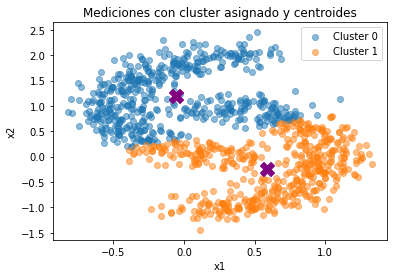

In [24]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

plt.scatter(df1.x1,df1.x2, label = "Cluster 0", alpha = 0.5)
plt.scatter(df2.x1, df2.x2, label = "Cluster 1", alpha = 0.5)
plt.scatter(kmc[:,0],kmc[:,1], marker = "X", color = "Purple", s = 200)

plt.title("Mediciones con cluster asignado y centroides")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.show()

**Questions**

Provide a detailed description of your results

En esta caso, dividiendolo en dos grupos podemos ver como la figura es dividida a la mitad de manera horizontal en vez de separar ambas secciones de la figura. Esto se debe en primer lugar a la aleatoriedad que presenta la función de KMeans así como la posición de los centroides asignados funcionando como una especie de promedio.

## A5 Elbow Plot

Compute the elbow plot

In [25]:
#Init list of sse
SSE = []
#Define K
K = [1,2,3,4,5,6,7,8,9,10]
#For each K
for x in K:
    tempkm = KMeans(n_clusters = x, n_init="auto")
    tempkm.fit_predict(df.iloc[:, 0:4]) 
    SSE.append(tempkm.inertia_)

C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

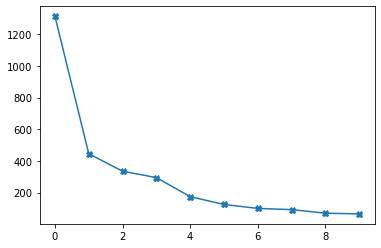

In [26]:
# Plot sse vs K
plt.plot(range(0,10),SSE, marker = "X")
plt.show()



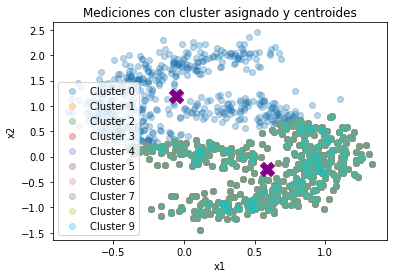

In [27]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]
df6 = df[df.Cluster==5]
df7 = df[df.Cluster==6]
df8 = df[df.Cluster==7]
df9 = df[df.Cluster==8]
df10 = df[df.Cluster==9]

plt.scatter(df1.x1,df1.x2, label = "Cluster 0", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 1", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 2", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 3", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 4", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 5", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 6", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 7", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 8", alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 9", alpha = 0.3)

plt.scatter(kmc[:,0],kmc[:,1], marker = "X", color = "Purple", s = 200)

plt.title("Mediciones con cluster asignado y centroides")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.show()

## Questions

__**What is the best number of clusters K?**__
En este caso el mejor número de clusters se encuentra entre 5 y 7. Como podemos observar en la gráfica los valores del error cuadrático no descienden mucho más después de pasar este rango.


__**Does this number of clusters agree with your initial guess?**__
Para nada, al iniciar indiqué dos clusters únicamente debido a la figura que se formaba al graficar los datos, dando una especie de "S" o de espiral dividida en dos secciones.

# Part 2

1) Load the dataset using "load_digits()" from "sklearn.datasets"

In [28]:
digits = load_digits()
dfdig = pd.DataFrame(np.column_stack([digits['data'], digits['target']]), columns=digits['feature_names'] + ['target'])

dfdig

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


2) Plot some of the observations

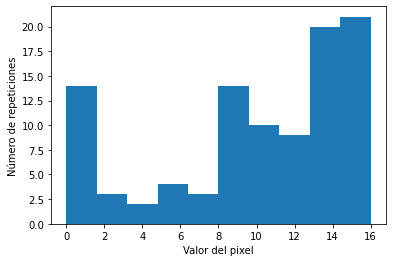

<Figure size 432x288 with 0 Axes>

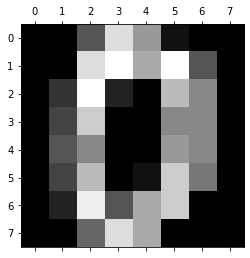

In [29]:
plt.hist(dfdig.iloc[:100, 3])
plt.xlabel("Valor del pixel")
plt.ylabel("Número de repeticiones")
plt.show()

plt.gray()
plt.matshow(digits.images[0])

3) Do KMeans clustering

C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


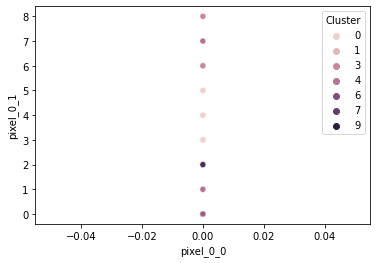

In [30]:
K = 10

km = KMeans(n_clusters = K, n_init="auto", random_state = 10)

clusters = km.fit_predict(dfdig)

dfdig["Cluster"] = clusters

sns.scatterplot(data = dfdig, x = "pixel_0_0", y = "pixel_0_1", hue = "Cluster")

plt.show()

4) Verify your results in any of the observations

In [31]:
indices = [0, 15, 2, 4, 17, 30]
for i in indices:
    print("Target real:"+str(digits.target[i])+"\tPredicción: "+str(clusters[i]))

Target real:0	Predicción: 6
Target real:5	Predicción: 3
Target real:2	Predicción: 7
Target real:4	Predicción: 9
Target real:7	Predicción: 4
Target real:0	Predicción: 6


## Questions

Provides a detailed description of your results.

load_digits() se trata de un datasets de sklearn en el que se encuentran como forma de matriz los valores de imágenes 8x8 pixeles de números escritos a mano. Graficarlos con un scatterplot claramente no brinda mucha información en esta caso ya que estamos graficando únicamente una fracción de la información, sin embargo, es posible mapearlo y visualizarlo con un matshow, permitiendonos mostrar la imagen en la interfaz.

# Part 3

## Descripción de tu percepción del nivel de desarrollo de la subcompetencia


**SING0202A Interpretación de variables**

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Soy capaz de analizar conjuntos de datos según las columnas o según las figuras graficadas para preprocesar, segmentar y interpretar cualquier número de entradas de un archivo. De esta forma logro encontrar los posibles patrones entre las diferentes variables que puedan ser arrojadas, ayudándome a darle un mejor entendimiento a la información, así como el comportamiento estadístico de la misma.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Puedo identificar y selccionar variables relevantes y crear una relación entre ellas, evaluar el comportamiento de las gráficas mostradas y ajustarlas para mejorar la calidad infiriendo a partir de los resultados.
Me considero una persona con alto nivel de comprensión en cuanto a los modelos capaz de utilizar la analítica para realizar investigaciones rigurosas y tomar decisiones informadas basadas en datos.